In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)




In [2]:
from sklearn.linear_model import SGDClassifier

In [3]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

In [4]:
sc.fit(train_scaled, train_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [5]:
sc.score(train_scaled, train_target)

0.773109243697479

In [6]:
sc.score(test_scaled, test_target)

0.775

In [7]:
(sc.coef_, sc.intercept_)

(array([[ -6.30108425,  -0.59572877,   7.88184358,  28.50725844,
          -4.57524048],
        [-28.03749392, -13.01864322, -24.28354615,  37.56556064,
          -4.99368983],
        [ -3.60592802,  17.34855902, -49.65498791, -26.99712078,
          47.58058864],
        [  4.33466212,  15.13001677,  12.21938065, -24.53199057,
          -0.61293767],
        [-47.59621038, -19.7141122 ,  21.76713845,   1.91422976,
          21.00699325],
        [  7.03785146,   6.44153908,   8.0385569 , -19.38693385,
         -24.29711606],
        [-19.43087985,  -7.13217691,  -2.58092476,   0.7050211 ,
          11.6470326 ]]),
 array([-21.30540045, -43.1249902 , -14.51022923, -30.38561783,
        -17.12077511, -62.17137674, -25.16714949]))

In [8]:
sc.partial_fit(train_scaled, train_target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [9]:
(sc.coef_, sc.intercept_)

(array([[ -7.0396623 ,  -1.28306727,   7.25597022,  28.71657394,
          -4.89295713],
        [-29.21415596, -13.2773105 , -24.60703087,  39.32184073,
          -5.43222837],
        [ -7.3190033 ,  19.49315828, -48.23835082, -19.99863189,
          49.38393316],
        [  4.03865784,  14.81324244,  12.04123747, -23.66013502,
          -0.62003203],
        [-43.33340099, -17.41512256,  25.78661139,   7.41327058,
          23.73358558],
        [  4.94980036,   2.65174709,   4.67416818, -24.63858538,
         -30.84761097],
        [-16.86592394,  -6.43699427,  -1.63347156,   3.2042301 ,
          16.59860137]]),
 array([-18.84376871, -37.74597302, -21.07921657, -29.70258666,
        -17.90870911, -61.7776268 , -17.63177127]))

In [10]:
sc.score(train_scaled, train_target)

0.8151260504201681

In [11]:
sc.score(test_scaled, test_target)

0.825

In [27]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

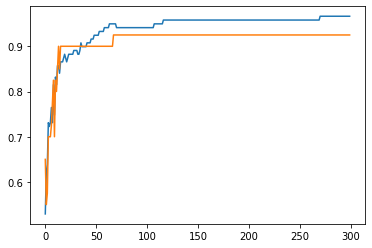

In [28]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [34]:
sc = SGDClassifier(loss='log', max_iter=100, tol=0.00001, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.775


In [ ]:
SGDClassifier()